In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import xgboost as xgb
import plotly.graph_objects as go

In [ ]:
f_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_dataset.csv')
final_dataset = f_dataset.drop(['Date', 'Time'], axis=1, inplace=False)
final_dataset

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary,Energy
0,5.97,104,10.24,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy,NaN
1,4.88,99,9.76,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy,NaN
2,3.70,98,9.46,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy,NaN
3,3.12,99,9.23,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy,NaN
4,1.85,111,9.26,9.21,1015.98,7.24,3.70,rain,fog,1.00,Foggy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21160,12.68,247,7.39,3.06,997.07,3.91,6.08,rain,partly-cloudy-night,0.74,Partly Cloudy,3737.860001
21161,13.78,249,6.56,2.76,998.15,3.03,5.61,rain,clear-night,0.77,Clear,3620.274999
21162,14.31,248,6.47,2.71,999.28,3.06,5.25,rain,clear-night,0.77,Clear,3292.223998
21163,14.31,248,5.96,2.69,1000.33,2.68,4.69,rain,clear-night,0.80,Clear,3046.382999


In [ ]:
f_dataset.columns

Index(['visibility', 'windBearing', 'temperature', 'Date', 'Time', 'dewPoint',
       'pressure', 'apparentTemperature', 'windSpeed', 'precipType', 'icon',
       'humidity', 'summary', 'Energy'],
      dtype='object')

In [ ]:
i = 0
for index, row in final_dataset.iterrows():
  if np.isnan(row['Energy']):
    final_dataset.drop(index, axis = 0, inplace=True)
    i+=1
print(i)

1543


In [ ]:
final_dataset['Energy'].fillna(final_dataset['Energy'].mean(), inplace=True)
final_dataset['pressure'].fillna(final_dataset['pressure'].mean(), inplace = True)

In [ ]:
final_dataset['precipType'].replace({'rain':0,'snow':1}, inplace = True)
final_dataset['icon'].replace({'partly-cloudy-night': 0, 'fog':1, 'partly-cloudy-day':2, 'cloudy':3,'clear-night':4, 'clear-day':5, 'wind':6}, inplace=True)
final_dataset['summary'].replace({'Partly Cloudy':0, 'Foggy':1, 'Mostly Cloudy':2, 'Overcast':3, 'Clear':4,'Breezy and Partly Cloudy':5, 'Breezy and Mostly Cloudy':6, 'Breezy':7,'Breezy and Overcast':8, 'Windy and Mostly Cloudy':9,'Windy and Partly Cloudy':10, 'Windy':11, 'Windy and Overcast':12}, inplace=True)

In [ ]:
MSE_values = {}

Linear Regression

In [ ]:
X = final_dataset.drop('Energy', axis=1)
y = final_dataset['Energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
MSE_values['Linear_regressor'] = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 946076.458327119
R-squared: 0.08529321731107253


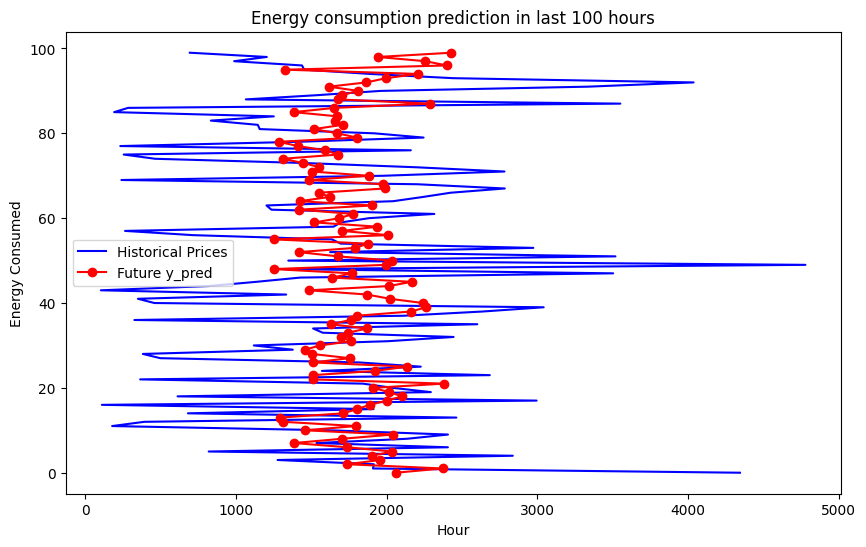

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[-100:], [i for i in range(len(y_test[-100:]))], label='Historical Prices', color='blue')
plt.plot(y_pred[-100:], [i for i in range(len(y_pred[-100:]))], label='Future y_pred', color='red', marker='o')
plt.xlabel('Hour')
plt.ylabel('Energy Consumed')
plt.title('Energy consumption prediction in last 100 hours')
plt.legend()
plt.show()

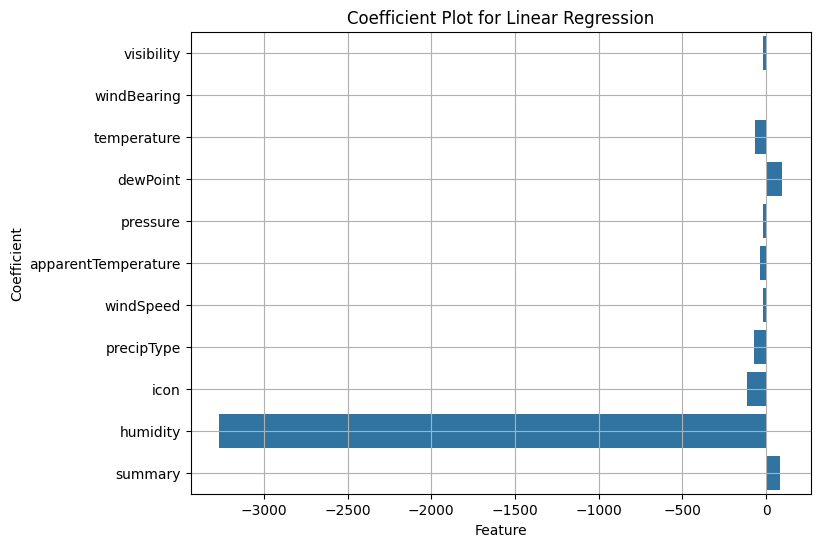

In [ ]:
coefficients = model.coef_
feature_names = final_dataset.columns.tolist()[:-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients, y=feature_names, orient = 'h')
plt.title('Coefficient Plot for Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.grid(True)
plt.show()

KNN

In [ ]:
mse_values = []
r_score = []
k_values = list(range(1, 6))
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r_score.append(r2)
    mse_values.append(mse)
MSE_values['KNN'] = mse_values
MSE_values['KNN_r2'] = r_score

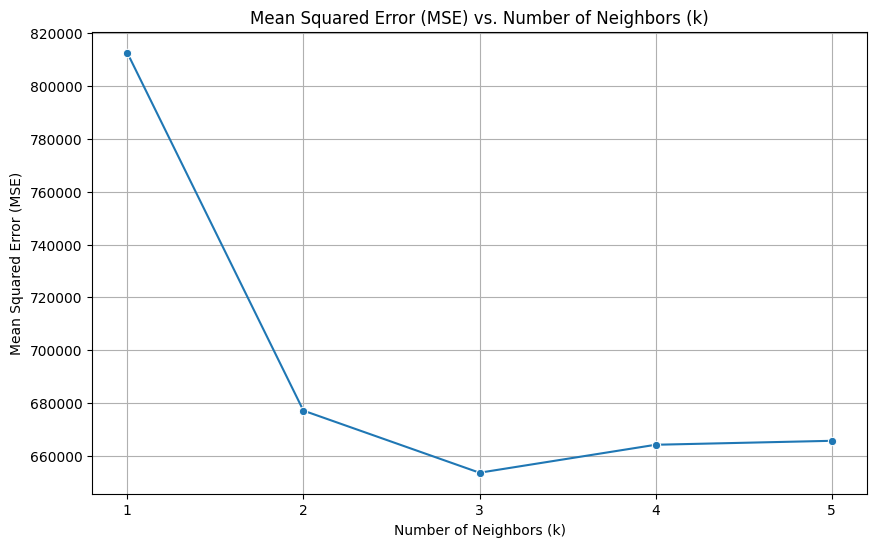

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=mse_values, marker='o')
plt.title('Mean Squared Error (MSE) vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

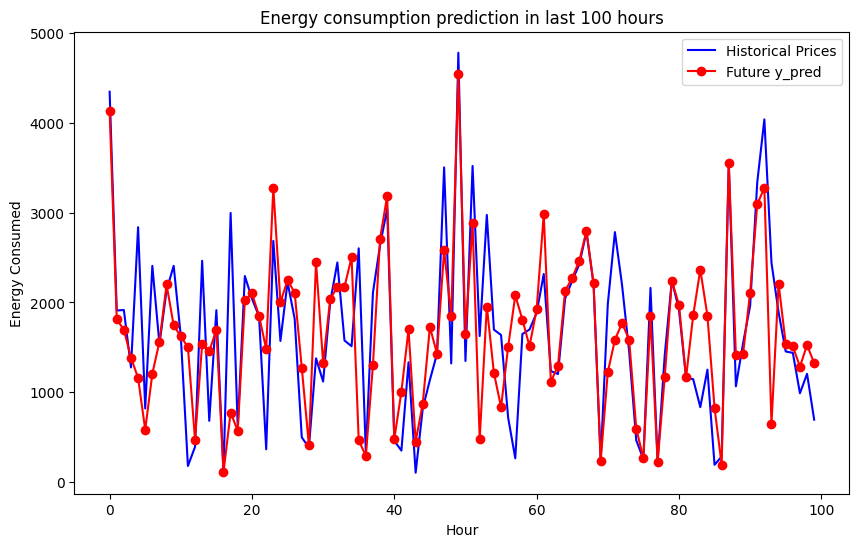

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=MSE_values['KNN'].index(min(MSE_values['KNN'])))
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(y_test[-100:]))], y_test[-100:], label='Historical Prices', color='blue')
plt.plot([i for i in range(len(y_pred[-100:]))], y_pred[-100:], label='Future y_pred', color='red', marker='o')
plt.xlabel('Hour')
plt.ylabel('Energy Consumed')
plt.title('Energy consumption prediction in last 100 hours')
plt.legend()
plt.show()

Random Forest

In [ ]:
mse_values = []
r_score = []
num_estimators = list(range(1, 6))

for n_estimators in num_estimators:
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r_score.append(r2)
    mse_values.append(mse)
MSE_values['Random Forest Regressor'] = mse_values
MSE_values['RF_r2'] = r_score

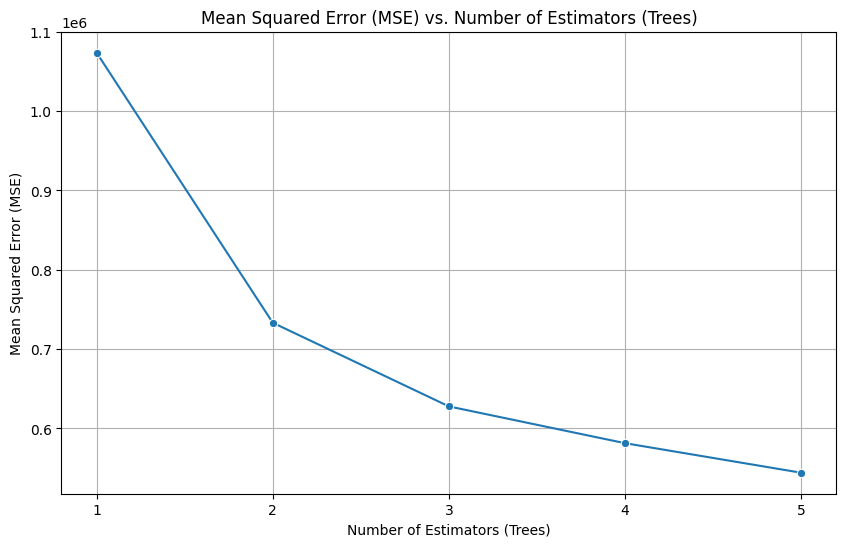

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=num_estimators, y=mse_values, marker='o')
plt.title('Mean Squared Error (MSE) vs. Number of Estimators (Trees)')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(num_estimators)
plt.grid(True)
plt.show()

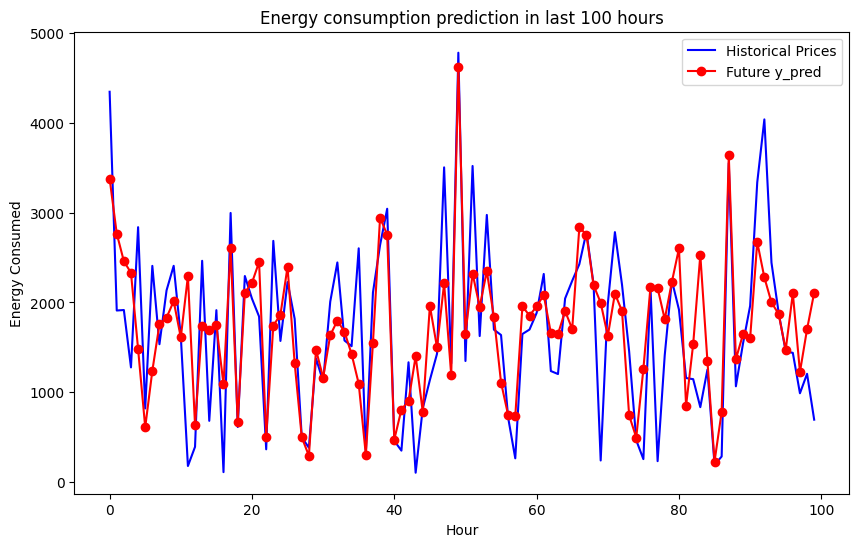

In [ ]:
rf_model = RandomForestRegressor(n_estimators=MSE_values['Random Forest Regressor'].index(min(MSE_values['Random Forest Regressor'])), random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(y_test[-100:]))], y_test[-100:], label='Historical Prices', color='blue')
plt.plot([i for i in range(len(y_pred[-100:]))], y_pred[-100:], label='Future y_pred', color='red', marker='o')
plt.xlabel('Hour')
plt.ylabel('Energy Consumed')
plt.title('Energy consumption prediction in last 100 hours')
plt.legend()
plt.show()

Ridge Regression

In [ ]:
mse_values = []
r_score = []
alpha_values = [0.01, 0.1, 1, 10, 100]

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred = ridge_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r_score.append(r2)
    mse_values.append(mse)
MSE_values['Ridge Regressor'] = mse_values
MSE_values['Ridge_r2'] = r_score

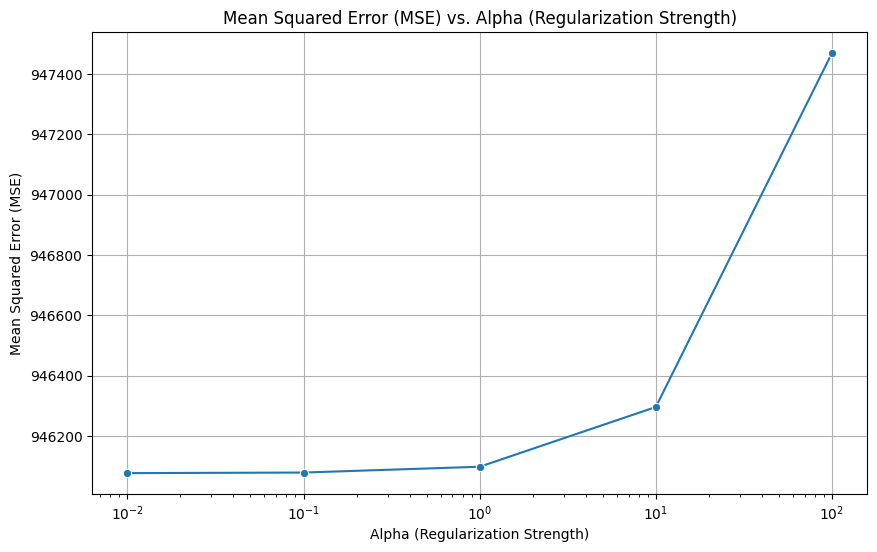

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=alpha_values, y=mse_values, marker='o')
plt.title('Mean Squared Error (MSE) vs. Alpha (Regularization Strength)')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xscale('log')
plt.grid(True)
plt.show()

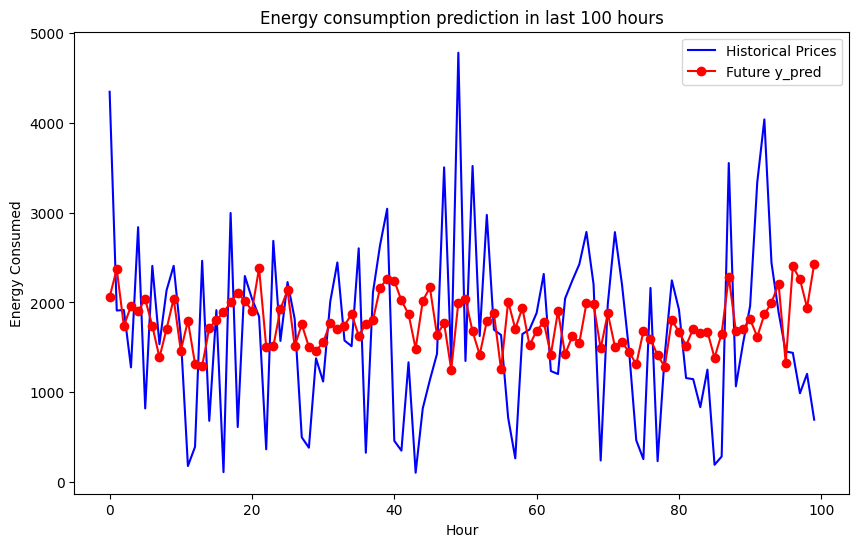

In [ ]:
model = Ridge(alpha=MSE_values['Ridge Regressor'].index(min(MSE_values['Ridge Regressor'])), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(y_test[-100:]))], y_test[-100:], label='Historical Prices', color='blue')
plt.plot([i for i in range(len(y_pred[-100:]))], y_pred[-100:], label='Future y_pred', color='red', marker='o')
plt.xlabel('Hour')
plt.ylabel('Energy Consumed')
plt.title('Energy consumption prediction in last 100 hours')
plt.legend()
plt.show()

SVM

In [ ]:
mse_values = []
r_score = []
C_values = [0.01, 0.1, 1, 10, 100]

for C in C_values:
    svm_model = SVR(C=C, kernel='linear')
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r_score.append(r2)
    mse_values.append(mse)
MSE_values['SVM Regressor'] = mse_values
MSE_values['SVM_r2'] = r_score

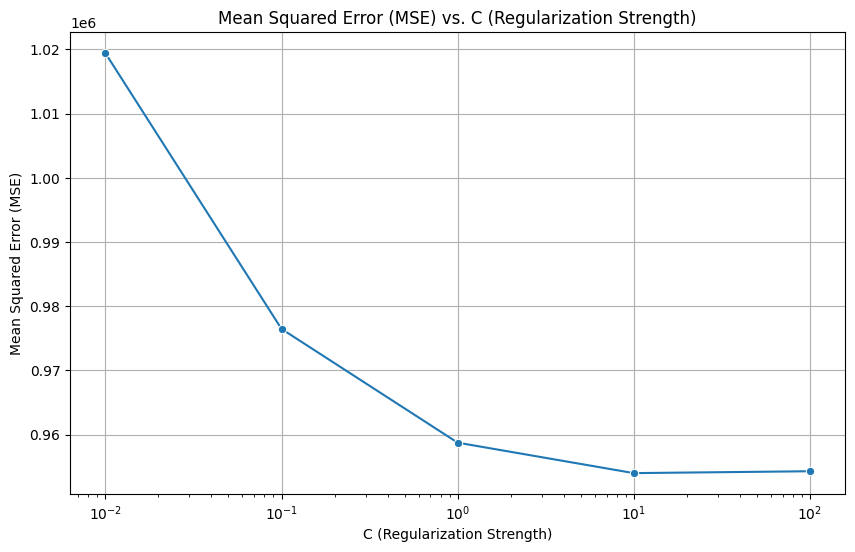

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=C_values, y=mse_values, marker='o')
plt.title('Mean Squared Error (MSE) vs. C (Regularization Strength)')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xscale('log')
plt.grid(True)
plt.show()

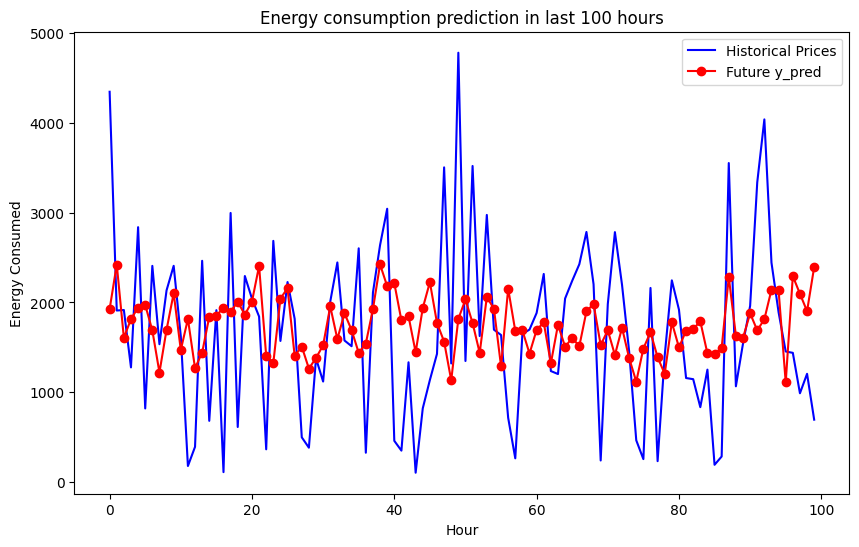

In [ ]:
model = SVR(C=MSE_values['SVM Regressor'].index(min(MSE_values['SVM Regressor'])), kernel = 'linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(y_test[-100:]))], y_test[-100:], label='Historical Prices', color='blue')
plt.plot([i for i in range(len(y_pred[-100:]))], y_pred[-100:], label='Future y_pred', color='red', marker='o')
plt.xlabel('Hour')
plt.ylabel('Energy Consumed')
plt.title('Energy consumption prediction in last 100 hours')
plt.legend()
plt.show()

XGBoost

In [ ]:
mse_values = []
r_score = []
learning_rates = [0.01, 0.1, 0.3, 0.5, 1.0]

for lr in learning_rates:
    xgb_model = xgb.XGBRegressor(learning_rate=lr, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r_score.append(r2)
    mse_values.append(mse)
MSE_values['XGB Regressor'] = mse_values
MSE_values['XGB_r2'] = r_score

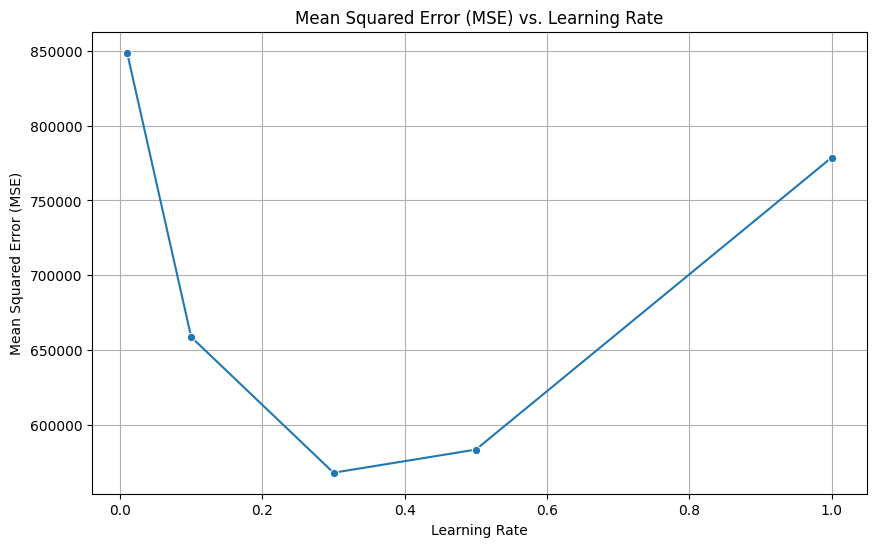

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=learning_rates, y=mse_values, marker='o')
plt.title('Mean Squared Error (MSE) vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

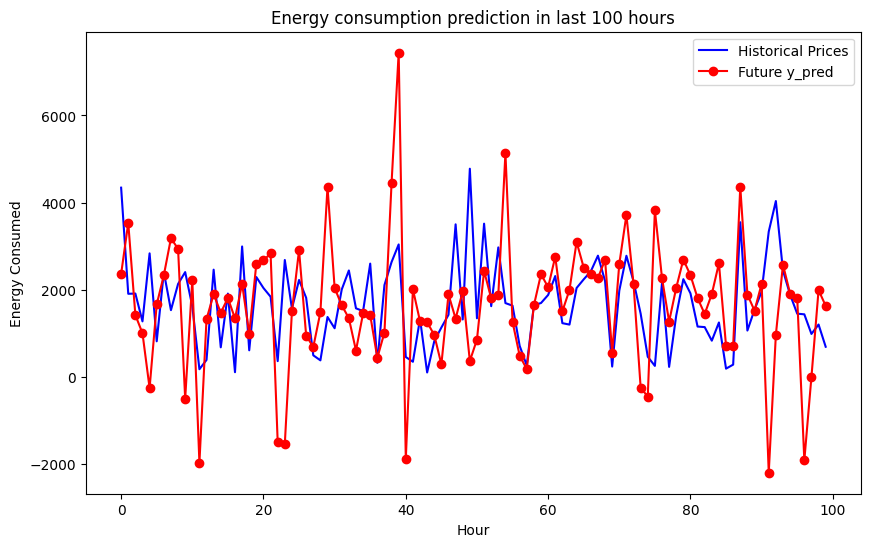

In [ ]:
model = xgb.XGBRegressor(learning_rate=MSE_values['XGB Regressor'].index(min(MSE_values['XGB Regressor'])), random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(y_test[-100:]))], y_test[-100:], label='Historical Prices', color='blue')
plt.plot([i for i in range(len(y_pred[-100:]))], y_pred[-100:], label='Future y_pred', color='red', marker='o')
plt.xlabel('Hour')
plt.ylabel('Energy Consumed')
plt.title('Energy consumption prediction in last 100 hours')
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame({key: pd.Series(value).fillna(0) for key, value in MSE_values.items()})
df

,Linear_regressor,KNN,KNN_r2,Random Forest Regressor,RF_r2,Ridge Regressor,Ridge_r2,SVM Regressor,SVM_r2,XGB Regressor,XGB_r2
0,972.664618,812572.405208,0.214371,1.073622e+06,-0.038023,946076.669572,0.085293,1.019426e+06,0.014376,848630.551706,0.179508
1,NaN,677142.264874,0.345310,7.332105e+05,0.291101,946078.572835,0.085291,9.764704e+05,0.055907,658791.741330,0.363052
2,NaN,653636.389830,0.368037,6.277394e+05,0.393075,946097.790743,0.085273,9.587552e+05,0.073035,568193.291141,0.450647
3,NaN,664217.743861,0.357806,5.813584e+05,0.437918,946295.779430,0.085081,9.540113e+05,0.077621,583638.024157,0.435714
4,NaN,665715.606257,0.356358,5.441332e+05,0.473909,947468.962844,0.083947,9.543046e+05,0.077338,778655.367210,0.247163
